In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sys
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read in `business` json file

In [22]:
business = pd.read_json('../Dataset/yelp_academic_dataset_business.json', lines=True)
print(business.shape)
business.head()

(192609, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."


In [23]:
business.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ..."
6,5JucpCfHZltJh5r1JabjDg,Edgeworxx Studio,20 Douglas Woods Drive Southeast,Calgary,AB,T2Z 1K4,50.943646,-114.001828,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Beauty & Spas, Hair Salons",None
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
8,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18..."
9,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0..."


Keep only business that are still **open**

In [3]:
business.is_open.value_counts()

1    158525
0     34084
Name: is_open, dtype: int64

In [4]:
# Keep only business that are still open
# Drop columns that may not be relavent
df_business = business[business['is_open']==1].drop(['is_open'], axis=1)
print(df_business.shape)
df_business.head(2)

(158525, 13)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."


Look distribution of **states**

Number of states: 36


(AZ    46910
 NV    29562
 ON    26525
 OH    12546
 NC    12419
 PA     9430
 QC     7623
 AB     6694
 WI     4210
 IL     1545
 Name: state, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x204174d2888>)

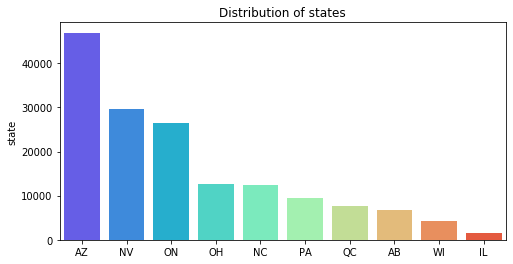

In [24]:
print('Number of states: {}'.format(len(df_business.state.value_counts())))
plt.figure(figsize = (8,4))
state_vc = df_business.state.value_counts()[:10]
plt.title('Distribution of states')
state_vc, sns.barplot(x= state_vc.index, y= state_vc, palette = 'rainbow')

Yelp contains businesses from 36 states. The top 3 states containing the most number of reviews are: 
- AZ - Arizona (USA)
- NV - Nevada (USA)
- ON - Ontario (Canada)

Look at distribution of **city**

Number of cities: 1148


(Las Vegas     23793
 Phoenix       15473
 Toronto       14331
 Charlotte      7947
 Scottsdale     7081
 Calgary        6446
 Pittsburgh     5737
 Montréal       5163
 Mesa           5149
 Henderson      4026
 Tempe          3584
 Chandler       3525
 Name: city, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x20407b4d848>)

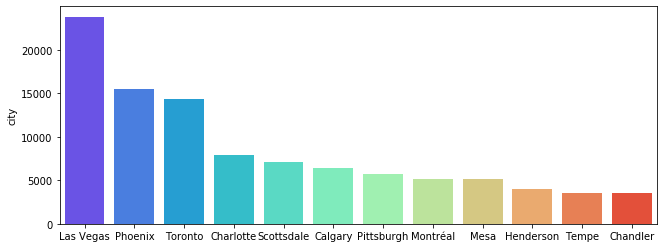

In [6]:
print('Number of cities: {}'.format(len(df_business.city.value_counts())))
city_vc = df_business.city.value_counts()[:12]
plt.figure(figsize = (10.7,4))
city_vc, sns.barplot(x= city_vc.index, y= city_vc, palette = 'rainbow')

Yelp contains businesses from 1148 cities. The top 5 cities containing the most number of reviews are: 
- Las Vegas - Nevada (USA)
- Phoenix - Arizona (USA)
- Toronto - Ontario (Canada)
- Charlotte - North Carolina (USA)
- Scottsdale - Arizona (USA)

Explode and find the businesses associated with food for each state


In [7]:
# df.explode requires pandas ver 0.25
# Create one row for each series that contain comma-separated items
df_business_explode = df_business.assign(categories = df_business.categories.str.split(', ')).explode('categories')
df_business_explode.sample(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
13740,yxgpKCqr7nUFKAk0z2_d0A,Avon Animal & Bird Hospital,37160 Detroit Rd,Avon,OH,44011,41.450683,-82.036670,5.0,6,None,Pet Sitting,"{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
192244,3MR0ceuZDmD_C1hB-2dn0Q,OneSelf Therapy,"2090 N Dobson Rd, Ste 1",Chandler,AZ,85224,33.337325,-111.877108,4.5,29,"{'BusinessParking': '{'garage': False, 'street...",Yoga,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
126233,ByTe_MSUlqd8yGvFPKerNA,Dave's Supermarket,12438 Cedar Rd,Cleveland,OH,44106,41.500762,-81.593065,2.5,27,"{'BusinessParking': '{'garage': False, 'street...",Food,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [8]:
def value_counts_df(df, col):
    df = pd.DataFrame(df[col].value_counts())
    df.index.name = col
    df.columns = ['count']
    return df

In [9]:
explode_state_vc = value_counts_df(df_business_explode.groupby('state'),'categories')
explode_state_vc = explode_state_vc.reset_index()

In [10]:
explode_state_vc = explode_state_vc.loc[explode_state_vc['state'].isin(['AZ','NV','ON'])].sort_values(by= 'count', ascending = False)
cat_list = explode_state_vc.head(10).categories.value_counts().index.tolist()

In [28]:
def stacked_graph(df,cat_list, col1, col2, value):
    fig, ax = plt.subplots(figsize=(10,7))  

    categories = cat_list
    margin_bottom = np.zeros(len(df[col1].drop_duplicates()))
    colors = ["#f8748e", "#f6f871","#afda40","#80e5c9",
              "#9bd3f4","#919cf7",'#b32e71']

    for num, cat in enumerate(categories):
        values = list(df[df[col2] == cat].loc[:, value])

        df[df[col2] == cat].plot.bar(x=col1,y=value, ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=cat)
        margin_bottom += values
        plt.title('Distribution of categories per state')
    return plt.show()

IndexError: list index out of range

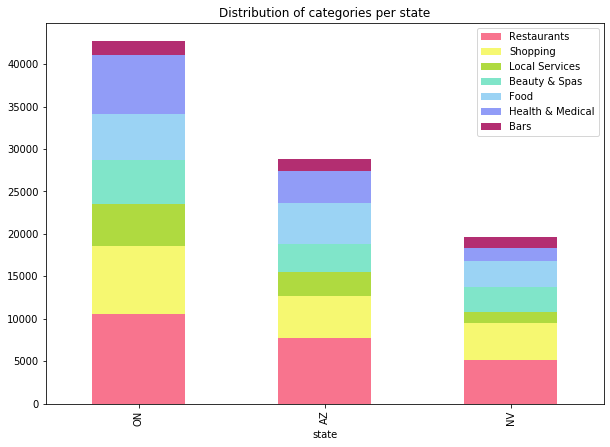

In [29]:

explode_state_vc.head(10), stacked_graph(explode_state_vc,cat_list,'state','categories','count')

From the graph above, we are able to see that ON (Ontario, Canada) has the most number of restaurants and food which are businesses associated with food industry. As such we will be looking at ON

Now to look at Ontario. Determine whether to focus on Ontario as a whole or only use a part of Ontario

In [13]:
explode_ON_vc = df_business_explode.loc[df_business_explode.state == 'ON']
explode_ON_vc = value_counts_df(explode_ON_vc.groupby('city'),'categories')
explode_ON_vc = explode_ON_vc.reset_index()

In [14]:
# Looking only at top 10 categories
explode_ON_vc = explode_ON_vc.sort_values(by= 'count', ascending = False)

In [15]:
# Looking only at top 10 cities
city_list = explode_ON_vc.city.value_counts().sort_values(ascending = False).index.tolist()
explode_ON_vc = explode_ON_vc.loc[explode_ON_vc.city.isin(city_list[:10])]

In [16]:
explode_ON_vc.city.value_counts()

Toronto          888
Mississauga      567
Markham          441
North York       436
Richmond Hill    412
Vaughan          388
Scarborough      387
Brampton         383
Etobicoke        367
Newmarket        293
Name: city, dtype: int64

In [17]:
cat_list = explode_ON_vc.head(10).categories.value_counts().index.tolist()
cat_list

['Restaurants',
 'Shopping',
 'Local Services',
 'Beauty & Spas',
 'Food',
 'Health & Medical',
 'Bars',
 'Coffee & Tea',
 'Nightlife']

In [30]:
def stacked_graph(df,cat_list, col1, col2, value):
    fig, ax = plt.subplots(figsize=(10,7))  

    categories = cat_list
    margin_bottom = np.zeros(len(df[col1].drop_duplicates()))
    colors = ["#c9a4eb", "#8966fa","#83dfff","#99e3c9",
              "#37f854","#ddf8bf",'#efe192',"#e0960f",
              "#ffacac","#eb4991"]

    for num, cat in enumerate(categories):
        values = list(df[df[col2] == cat].loc[:, value])

        df[df[col2] == cat].plot.bar(x=col1,y=value, ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=cat)
        margin_bottom += values
        plt.title('Distribution of categories per city')
    return plt.show()

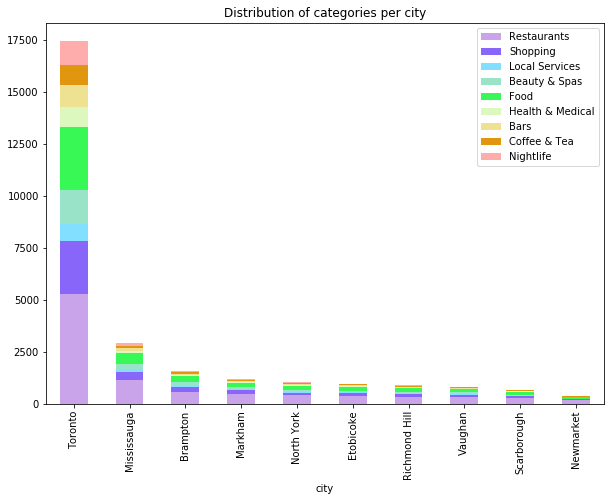

(             city        categories  count
 5960      Toronto       Restaurants   5252
 5961      Toronto              Food   3041
 5962      Toronto          Shopping   2564
 5963      Toronto     Beauty & Spas   1618
 5964      Toronto         Nightlife   1165
 2774  Mississauga       Restaurants   1142
 5965      Toronto              Bars   1045
 5966      Toronto  Health & Medical    973
 5967      Toronto      Coffee & Tea    952
 5968      Toronto    Local Services    836, None)

In [31]:
explode_ON_vc.head(10), stacked_graph(explode_ON_vc,cat_list,'city','categories','count')

From the graph above, we can see that Toronto has a significantly higher numeber of Restaurants, Bars, Coffee & Tea and Food businesses which are businesses associated with food. As such the focus on this recommender will be Toronto  

In [21]:
df_business.to_csv('../Dataset/business_01a.csv', index = False)